# Worksheet 15

Name: Alexander Miller
UID: U52161825

### Topics

- Support Vector Machines

## Support Vector Machines

a) Follow along in class to implement the perceptron algorithm and create an animation of the algorithm.

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/temp.png'

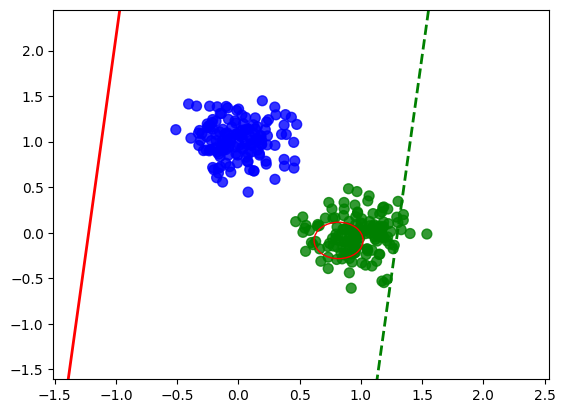

In [1]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

TEMPFILE = "/mnt/data/temp.png"  # Adjusted to save in accessible directory
CENTERS = [[0, 1], [1, 0]]

# Dataset
X, labels = datasets.make_blobs(n_samples=300, centers=CENTERS, cluster_std=0.2, random_state=0)
Y = np.array(list(map(lambda x: -1 if x == 0 else 1, labels.tolist())))

# Initializing w and b
w = np.array([0, 0])
b = 0

# Perceptron Parameters
epochs = 100
alpha = 0.05

def snap(x, w, b, error):
    xplot = np.linspace(-3, 3)
    yplot = (-w[0] * xplot - b) / w[1]
    margin = 1 / np.linalg.norm(w)
    
    left_margin = yplot - margin
    right_margin = yplot + margin

    fig, ax = plt.subplots()
    ax.scatter(X[:, 0], X[:, 1], color=['green' if label == 1 else 'blue' for label in Y], s=50, alpha=0.8)
    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), 0.2, color='red', fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), 0.2, color='yellow', fill=False))
    ax.plot(xplot, left_margin, 'g--', lw=2)
    ax.plot(xplot, yplot, 'r-', lw=2)
    ax.plot(xplot, right_margin, 'b--', lw=2)
    ax.set_xlim(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
    ax.set_ylim(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
    fig.savefig(TEMPFILE)
    plt.close()

    return im.open(TEMPFILE)

images = []
np.random.seed(0)  # For reproducibility
for epoch in range(epochs):
    i = np.random.randint(X.shape[0])
    x, y = X[i], Y[i]
    if y * (np.dot(w, x) + b) <= 0:
        error = True
        w = w + alpha * y * x
        b = b + alpha * y
    else:
        error = False
    images.append(snap(x, w, b, error))

images[0].save(
    'svm.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)

b) Consider the following dataset:

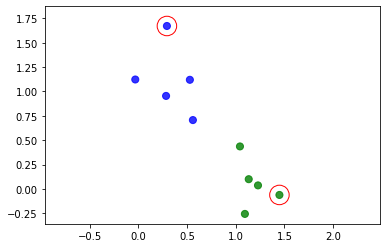

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[0, 1], [1, 0]]
X, _ = datasets.make_blobs(n_samples=10, centers=centers, cluster_std=0.3, random_state=0)
Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])

cs = np.array([x for x in 'bg'])
_, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],color=cs[Y].tolist(), s=50, alpha=0.8)
ax.set_aspect('equal', adjustable='datalim')
ax.add_patch(plt.Circle((X[0][0], X[0][1]), .1, color='r',fill=False))
ax.add_patch(plt.Circle((X[1][0], X[1][1]), .1, color='r',fill=False))
plt.show()

if we fit an SVM to the above dataset, moved the points circled in red, and re-fit the SVM, describe how the fit would change depending on how the points are moved.

The SVM fit is sensitive to the position of the support vectors. Moving the red-circled points—assuming they are support vectors or critical in some way—could potentially alter the hyperplane, especially if they are moved across the decision boundary or closer to it. If they are not support vectors and are not moved into a position where they become support vectors, the fit is unlikely to change.

c) If we were to fit an SVM to the above dataset, which points do you think would affect the decision boundary the most? Circle them in red.

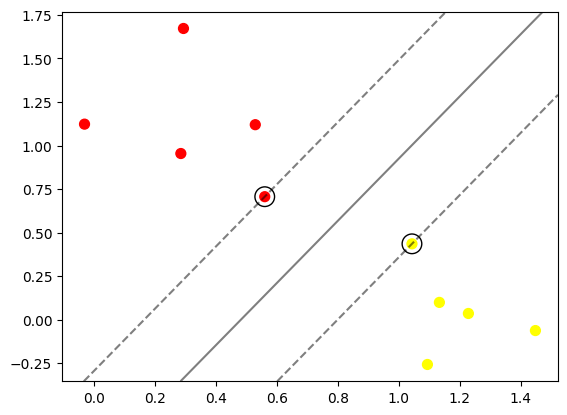

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# Generating the dataset as per the user's script
centers = [[0, 1], [1, 0]]
X, _ = make_blobs(n_samples=10, centers=centers, cluster_std=0.3, random_state=0)
Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])

# Fitting the SVM to the dataset
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, Y)

# Plotting the points
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')

# Drawing the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Highlighting the support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200,
           linewidth=1, facecolors='none', edgecolors='k')

plt.show()